# Wine quality dataset analysis - 'Quality' as target

The wine quality dataset is avaialble in UCI machine learning websit, but its having much bad records. I have cleaned it manually before using it here, you can download by clicking link.
    https://1drv.ms/u/s!AjQ5kZ9kJsZKiocz7xwa6SubiYC0YQ?e=3TNHLF

Imagine we have a two-dimension (A, B) numeric data, and if we want to find a relationship between A and B, the simple way is to plot a scatterplot. Based on that, we can say it's negatively correlated or positively correlated, or there exists no correlation between them at all.
But if we have 4,5,6 and N-dimensional numeric data, it's not possible to check each and everything. The simple way is to do the principal component analysis. PCA is a type of dimensionality reduction where it can reduce the higher-order dimensions to lower-order dimensions.Now imagine we have three-dimension (A, B, C) numeric data. If we want to find the relationship between A, B and C. We need to calculate scatter plot between A, B then B, C and finally A, C. Based on it, we need to plot a 3D axis graph which is achievable.


In [98]:
#Import the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [99]:
pwd

'C:\\Users\\Karthik\\Pictures\\LinkedIn tasks\\Datasets'

In [100]:
cd "C:\Users\Karthik\Pictures\LinkedIn tasks\Datasets"

C:\Users\Karthik\Pictures\LinkedIn tasks\Datasets


In [101]:
df = pd.read_csv("winequalityN.csv")

In [102]:
df.head()

,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Here we use all the variables for analysis except the type of wine which has been performed a individual analysis. Here our aim is to reduce 11 dimensions to 2 dimensions with minimal loss of data.

Create two new variables so that input and output can be performed separately and merged later.

In [103]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
x = df.loc[:, features].values

In [104]:
y = df.loc[:,['quality']].values

As we are going to compare several variables and each of them has different value ranges. For example, ph value range would be from 0 to 14, whereas fixed acidity is in various format. Hence standardisation technique is an important task here.

In [105]:
x = StandardScaler().fit_transform(x)

Now we can compare the data before and after transforming it's different and standardized.

In [106]:
pd.DataFrame(data = x, columns = features).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905


We assumed PCA components to be 2 which is easy to visualize and compare.

In [107]:
pca = PCA(n_components=2)

In [108]:
principalComponents = pca.fit_transform(x)

In [109]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [110]:
principalDf.head(5)

,principal component 1,principal component 2
0,2.756749,3.061957
1,-0.126002,-0.492360
2,0.190934,0.378972
3,1.803166,0.602815
4,1.803166,0.602815


In [111]:
df[['quality']].head()

,quality
0,6
1,6
2,6
3,6
4,6


Concatenating the x (PCA) and y (Target) values so it makes sense to visualize

In [112]:
finalDf = pd.concat([principalDf, df[['quality']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,quality
0,2.756749,3.061957,6
1,-0.126002,-0.492360,6
2,0.190934,0.378972,6
3,1.803166,0.602815,6
4,1.803166,0.602815,6


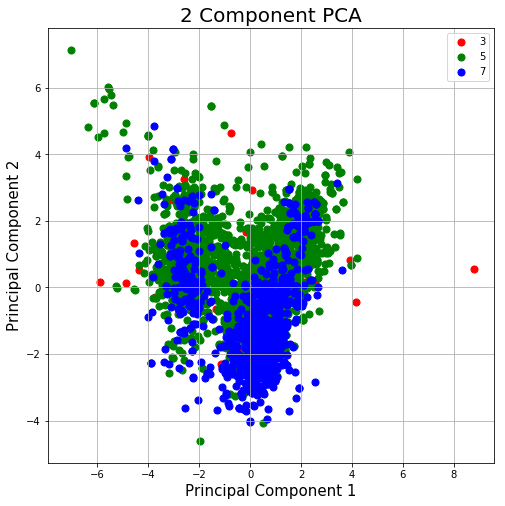

In [113]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [3, 5, 7]
colors = ['r', 'g', 'b']
for quality, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == quality
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Here we compare 3,5,7(quality) of wine data with its 11 different characteristics in a 2D chart. In other words, you can't analyze 11D data in a single scatter plot, and it would be difficult to interpret the results achieved. In this way, we can cluster data together to make assumptions about how they are residing.
We can say from the above graph the quality of wine of 5 and 7 is much different. The five quality range resides over Principal component 2, whereas 7 quality range resides over principal part 1. PCA1 is of higher importance than PCA2. 
On the other end, as we have very fewer records for wine quality 3, the records are scattered, and we can't deduct any results for it.

# We can conclude by saying that, wine quality 5 and 7 are having much difference in their contents.